In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

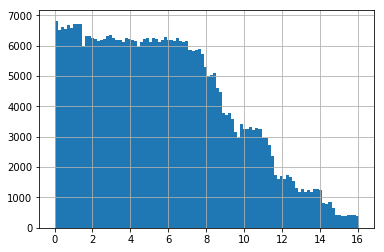

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4,10})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((233280, 1), (233280, 100), (233280,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 3: 22721, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 11: 28282, 12: 22648, 13: 21974, 15: 24269}'

In [20]:
quakes=set(qdf['index'])
quakes

{1, 3, 5, 6, 8, 9, 11, 12, 13, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((233280, 100), (233280, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 31min 46s, sys: 4min 6s, total: 35min 52s
Wall time: 3min 15s


In [26]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 208326, 2624, 3000)

In [27]:
qdf.iloc[topidxs].head()

index
index                    
quake_06_o17988314      6
quake_06_o23373381      6
quake_06_o23373373      6
quake_06_o23382979      6
quake_06_o18021814      6

In [28]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [29]:
idxdf.shape

(3000, 2624)

In [30]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6     1    13     6    15     9     6     8     9     6  ...    15   
1     6    15    13     6    15     9     6    13     5     6  ...    15   
2     6     1    13     6    15     9     6    13     3     6  ...    15   
3     6    15    13     6    15     9     6    13     9     6  ...    15   
4     6     1    13     6    15     9     6     9     9     6  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    15     1    15    15    11    15    15     8    15  
1    15     1    15    15    15    15    15     8    15  
2    15     1    15     1    11    15    15     8    15  
3     5     1    15     1     1    15    15     8     1  
4    15     1    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [31]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

1 3 5 6 8 9 11 12 13 15 


0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
0.0    0.31  0.85  0.45  0.36  0.62  0.61  0.56  0.82  0.61  0.13
0.1    0.37  0.09  0.40  0.25  0.28  0.24  0.34  0.14  0.32  0.24
0.2    0.22  0.04  0.12  0.09  0.09  0.11  0.09  0.03  0.06  0.18
0.3    0.08  0.01  0.03  0.06  0.01  0.03  0.01  0.01  0.01  0.08
0.4    0.01  0.00  0.00  0.05   NaN  0.01  0.00  0.00  0.00  0.05
0.5    0.00  0.00  0.00  0.07   NaN  0.00   NaN   NaN   NaN  0.04
0.6    0.00   NaN   NaN  0.08   NaN   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN  0.03   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.05
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10

0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.14
0.8     NaN   NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.19
0.7     NaN   NaN   NaN  0.03   NaN   NaN   NaN   NaN   NaN  0.23
0.6    0.00   NaN   NaN  0.11   NaN   NaN   NaN   NaN   NaN  0.28
0.5    0.00  0.00  0.00  0.18   NaN  0.00   NaN   NaN   NaN  0.32
0.4    0.02  0.00  0.00  0.23   NaN  0.01  0.00  0.00  0.00  0.37
0.3    0.09  0.02  0.04  0.29  0.01  0.04  0.01  0.01  0.01  0.44
0.2    0.31  0.06  0.15  0.39  0.10  0.15  0.10  0.04  0.07  0.62
0.1    0.69  0.15  0.55  0.64  0.38  0.39  0.44  0.18  0.39  0.87
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [32]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

1 3 5 6 8 9 11 12 13 15 


0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
0.0    0.25  0.84  0.43  0.32  0.60  0.59  0.58  0.82  0.58  0.11
0.1    0.42  0.10  0.43  0.27  0.30  0.26  0.33  0.15  0.37  0.24
0.2    0.26  0.04  0.11  0.10  0.09  0.12  0.09  0.02  0.05  0.20
0.3    0.06  0.01  0.02  0.06  0.00  0.03  0.01  0.00  0.00  0.08
0.4    0.01  0.00  0.00  0.07   NaN  0.00  0.00   NaN   NaN  0.06
0.5     NaN   NaN   NaN  0.09   NaN   NaN   NaN   NaN   NaN  0.05
0.6     NaN   NaN   NaN  0.08   NaN   NaN   NaN   NaN   NaN  0.05
0.7     NaN   NaN   NaN  0.01   NaN   NaN   NaN   NaN   NaN  0.05
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.08

0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
0.0    0.25  0.84  0.43  0.32  0.60  0.59  0.58  0.82  0.58  0.11
0.1    0.67  0.95  0.86  0.59  0.91  0.85  0.91  0.97  0.95  0.36
0.2    0.93  0.99  0.98  0.69  1.00  0.97  0.99  1.00  1.00  0.56
0.3    0.99  1.00  1.00  0.76  1.00  1.00  1.00  1.00  1.00  0.64
0.4    1.00  1.00  1.00  0.83   NaN  1.00  1.00   NaN   NaN  0.69
0.5     NaN   NaN   NaN  0.91   NaN   NaN   NaN   NaN   NaN  0.74
0.6     NaN   NaN   NaN  0.99   NaN   NaN   NaN   NaN   NaN  0.79
0.7     NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.84
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.88
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [33]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

1 3 5 6 8 9 11 12 13 15 


0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
0.0    0.19  0.84  0.42  0.29  0.58  0.58  0.58  0.82  0.56  0.11
0.1    0.50  0.11  0.44  0.29  0.33  0.27  0.33  0.15  0.40  0.24
0.2    0.27  0.04  0.12  0.11  0.09  0.13  0.09  0.03  0.04  0.21
0.3    0.05  0.01  0.02  0.08  0.00  0.02  0.00  0.00   NaN  0.08
0.4    0.00  0.00   NaN  0.08   NaN  0.00   NaN   NaN   NaN  0.07
0.5     NaN   NaN   NaN  0.10   NaN   NaN   NaN   NaN   NaN  0.05
0.6     NaN   NaN   NaN  0.06   NaN   NaN   NaN   NaN   NaN  0.05
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06

0                                                      
qno      1     3     5     6     8     9     11    12    13    15
index                                                            
0.0    0.19  0.84  0.42  0.29  0.58  0.58  0.58  0.82  0.56  0.11
0.1    0.69  0.95  0.86  0.57  0.91  0.85  0.91  0.97  0.96  0.35
0.2    0.95  0.99  0.98  0.69  1.00  0.98  1.00  1.00  1.00  0.55
0.3    1.00  1.00  1.00  0.76  1.00  1.00  1.00  1.00   NaN  0.64
0.4    1.00  1.00   NaN  0.85   NaN  1.00   NaN   NaN   NaN  0.71
0.5     NaN   NaN   NaN  0.94   NaN   NaN   NaN   NaN   NaN  0.76
0.6     NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.81
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.85
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.89
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.94
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [34]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      937860
3      188938
5      595010
6     1518564
8      428093
9      495232
11     454475
12     183552
13     409196
15    2661080
Name: index, dtype: int64

In [35]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     27819
3     18488
5     20194
6     15448
8     18685
9     22405
11    24388
12    17714
13    19235
15    23950
Name: index, dtype: int64

In [36]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((208326, 1), (208326, 100), (208326,))

In [37]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 3 train quake 1
(27819, 100) (27819,) (18488, 100) (18488,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07209	valid_1's l1: 1.76356
[100]	training's l1: 0.727388	valid_1's l1: 1.64578
[150]	training's l1: 0.563171	valid_1's l1: 1.61838
[200]	training's l1: 0.475651	valid_1's l1: 1.61594
[250]	training's l1: 0.426434	valid_1's l1: 1.61759
[300]	training's l1: 0.393018	valid_1's l1: 1.61854
[350]	training's l1: 0.366688	valid_1's l1: 1.62021
Early stopping, best iteration is:
[175]	training's l1: 0.512869	valid_1's l1: 1.61337
quake  1 3 (1.6133712441011716, 175)
valid quake 5 train quake 1
(27819, 100) (27819,) (20194, 100) (20194,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07209	valid_1's l1: 2.81137
[100]	training's l1: 0.727388	valid_1's l1: 2.83324
[150]	training's l1: 0.563171	valid_1's l1: 2.8601
[200]	training's l1: 0.475651	valid_1's l1: 2.8811
Early stopping, be

(18488, 100) (18488,) (15448, 100) (15448,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.788262	valid_1's l1: 1.00491
[100]	training's l1: 0.499598	valid_1's l1: 0.996079
[150]	training's l1: 0.347284	valid_1's l1: 1.0148
[200]	training's l1: 0.262135	valid_1's l1: 1.03227
[250]	training's l1: 0.215246	valid_1's l1: 1.04443
Early stopping, best iteration is:
[72]	training's l1: 0.632867	valid_1's l1: 0.99048
quake  3 6 (0.9904801668019467, 72)
valid quake 8 train quake 3
(18488, 100) (18488,) (18685, 100) (18685,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.788262	valid_1's l1: 1.12004
[100]	training's l1: 0.499598	valid_1's l1: 1.12949
[150]	training's l1: 0.347284	valid_1's l1: 1.15438
[200]	training's l1: 0.262135	valid_1's l1: 1.17496
[250]	training's l1: 0.215246	valid_1's l1: 1.18735
Early stopping, best iteration is:
[64]	training's l1: 0.682578	valid_1's l1: 1.11511
quake  3 8 (1.1151114233838493, 

quake  5 8 (0.7268123311664436, 455)
valid quake 9 train quake 5
(20194, 100) (20194,) (22405, 100) (22405,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.761799	valid_1's l1: 1.68599
[100]	training's l1: 0.497327	valid_1's l1: 1.68853
[150]	training's l1: 0.354662	valid_1's l1: 1.70427
[200]	training's l1: 0.27829	valid_1's l1: 1.72158
[250]	training's l1: 0.238073	valid_1's l1: 1.73254
Early stopping, best iteration is:
[62]	training's l1: 0.677681	valid_1's l1: 1.68278
quake  5 9 (1.682780392827018, 62)
valid quake 11 train quake 5
(20194, 100) (20194,) (24388, 100) (24388,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.761799	valid_1's l1: 2.27418
[100]	training's l1: 0.497327	valid_1's l1: 2.32962
[150]	training's l1: 0.354662	valid_1's l1: 2.36795
[200]	training's l1: 0.27829	valid_1's l1: 2.39618
Early stopping, best iteration is:
[34]	training's l1: 0.913939	valid_1's l1: 2.25605
quake  5 11 (2.256052

[150]	training's l1: 0.324896	valid_1's l1: 1.75422
[200]	training's l1: 0.250371	valid_1's l1: 1.72598
[250]	training's l1: 0.210416	valid_1's l1: 1.70669
[300]	training's l1: 0.186944	valid_1's l1: 1.69354
[350]	training's l1: 0.17072	valid_1's l1: 1.68289
[400]	training's l1: 0.159414	valid_1's l1: 1.67778
[450]	training's l1: 0.150586	valid_1's l1: 1.67419
[500]	training's l1: 0.143549	valid_1's l1: 1.67046
[550]	training's l1: 0.137479	valid_1's l1: 1.66682
[600]	training's l1: 0.132278	valid_1's l1: 1.66443
[650]	training's l1: 0.127708	valid_1's l1: 1.66333
[700]	training's l1: 0.123918	valid_1's l1: 1.66221
[750]	training's l1: 0.120268	valid_1's l1: 1.65961
[800]	training's l1: 0.117003	valid_1's l1: 1.65884
[850]	training's l1: 0.11405	valid_1's l1: 1.65797
[900]	training's l1: 0.111427	valid_1's l1: 1.65684
[950]	training's l1: 0.108906	valid_1's l1: 1.65507
[1000]	training's l1: 0.106533	valid_1's l1: 1.65349
[1050]	training's l1: 0.10442	valid_1's l1: 1.65156
[1100]	traini

[550]	training's l1: 0.148586	valid_1's l1: 0.799476
Early stopping, best iteration is:
[370]	training's l1: 0.176796	valid_1's l1: 0.796493
quake  8 5 (0.7964930533500558, 370)
valid quake 6 train quake 8
(18685, 100) (18685,) (15448, 100) (15448,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.748585	valid_1's l1: 0.98947
[100]	training's l1: 0.490207	valid_1's l1: 0.907265
[150]	training's l1: 0.347336	valid_1's l1: 0.888844
[200]	training's l1: 0.265674	valid_1's l1: 0.885311
[250]	training's l1: 0.222595	valid_1's l1: 0.888012
[300]	training's l1: 0.198887	valid_1's l1: 0.889097
[350]	training's l1: 0.182588	valid_1's l1: 0.890565
[400]	training's l1: 0.170397	valid_1's l1: 0.891854
Early stopping, best iteration is:
[225]	training's l1: 0.240552	valid_1's l1: 0.884935
quake  8 6 (0.8849348872973195, 225)
quake  8 8 (nan, nan)
valid quake 9 train quake 8
(18685, 100) (18685,) (22405, 100) (22405,)
Training until validation scores don't improve

[50]	training's l1: 0.856381	valid_1's l1: 1.61013
[100]	training's l1: 0.552072	valid_1's l1: 1.63914
[150]	training's l1: 0.405648	valid_1's l1: 1.67273
[200]	training's l1: 0.330048	valid_1's l1: 1.68918
Early stopping, best iteration is:
[16]	training's l1: 1.37248	valid_1's l1: 1.58075
quake  9 8 (1.580745145634883, 16)
quake  9 9 (nan, nan)
valid quake 11 train quake 9
(22405, 100) (22405,) (24388, 100) (24388,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.856381	valid_1's l1: 1.63253
[100]	training's l1: 0.552072	valid_1's l1: 1.53882
[150]	training's l1: 0.405648	valid_1's l1: 1.50618
[200]	training's l1: 0.330048	valid_1's l1: 1.49162
[250]	training's l1: 0.288932	valid_1's l1: 1.48349
[300]	training's l1: 0.263533	valid_1's l1: 1.48199
[350]	training's l1: 0.244971	valid_1's l1: 1.48241
[400]	training's l1: 0.229947	valid_1's l1: 1.4838
[450]	training's l1: 0.218094	valid_1's l1: 1.48526
[500]	training's l1: 0.208068	valid_1's l1: 1.487

[150]	training's l1: 0.441302	valid_1's l1: 2.24546
[200]	training's l1: 0.364198	valid_1's l1: 2.26016
Early stopping, best iteration is:
[8]	training's l1: 1.93068	valid_1's l1: 2.03788
quake  11 13 (2.037882759106907, 8)
valid quake 15 train quake 11
(24388, 100) (24388,) (23950, 100) (23950,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.918941	valid_1's l1: 1.5725
[100]	training's l1: 0.595838	valid_1's l1: 1.62092
[150]	training's l1: 0.441302	valid_1's l1: 1.66842
[200]	training's l1: 0.364198	valid_1's l1: 1.69808
Early stopping, best iteration is:
[16]	training's l1: 1.48792	valid_1's l1: 1.53216
quake  11 15 (1.5321571278567376, 16)
valid quake 1 train quake 12
(17714, 100) (17714,) (27819, 100) (27819,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.737836	valid_1's l1: 2.26691
[100]	training's l1: 0.473086	valid_1's l1: 2.17605
[150]	training's l1: 0.333721	valid_1's l1: 2.13526
[200]	training's l1

[50]	training's l1: 0.826612	valid_1's l1: 2.56144
[100]	training's l1: 0.551546	valid_1's l1: 2.51322
[150]	training's l1: 0.407537	valid_1's l1: 2.49254
[200]	training's l1: 0.329262	valid_1's l1: 2.48352
[250]	training's l1: 0.287089	valid_1's l1: 2.47893
[300]	training's l1: 0.260492	valid_1's l1: 2.47765
[350]	training's l1: 0.241713	valid_1's l1: 2.47829
[400]	training's l1: 0.227	valid_1's l1: 2.48108
[450]	training's l1: 0.21406	valid_1's l1: 2.48413
[500]	training's l1: 0.203775	valid_1's l1: 2.48802
Early stopping, best iteration is:
[315]	training's l1: 0.254201	valid_1's l1: 2.47693
quake  13 1 (2.476927345945879, 315)
valid quake 3 train quake 13
(19235, 100) (19235,) (18488, 100) (18488,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.826612	valid_1's l1: 1.26228
[100]	training's l1: 0.551546	valid_1's l1: 1.16248
[150]	training's l1: 0.407537	valid_1's l1: 1.13075
[200]	training's l1: 0.329262	valid_1's l1: 1.12096
[250]	training's l

[150]	training's l1: 0.366152	valid_1's l1: 1.882
[200]	training's l1: 0.286046	valid_1's l1: 1.85831
[250]	training's l1: 0.244648	valid_1's l1: 1.84433
[300]	training's l1: 0.221408	valid_1's l1: 1.83588
[350]	training's l1: 0.206472	valid_1's l1: 1.83182
[400]	training's l1: 0.194818	valid_1's l1: 1.82788
[450]	training's l1: 0.184939	valid_1's l1: 1.82369
[500]	training's l1: 0.176798	valid_1's l1: 1.82115
[550]	training's l1: 0.170198	valid_1's l1: 1.82127
[600]	training's l1: 0.164242	valid_1's l1: 1.81762
[650]	training's l1: 0.159035	valid_1's l1: 1.81518
[700]	training's l1: 0.154357	valid_1's l1: 1.81305
[750]	training's l1: 0.149937	valid_1's l1: 1.8108
[800]	training's l1: 0.146215	valid_1's l1: 1.80845
[850]	training's l1: 0.142524	valid_1's l1: 1.80773
[900]	training's l1: 0.139097	valid_1's l1: 1.80551
[950]	training's l1: 0.13614	valid_1's l1: 1.80394
[1000]	training's l1: 0.133412	valid_1's l1: 1.80137
[1050]	training's l1: 0.130838	valid_1's l1: 1.80035
[1100]	trainin

In [40]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [42]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [43]:
pvdf.style.apply(highlight_max,axis=1)

In [44]:
pvdf.style.apply(highlight_min,axis=1)

In [45]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))